# Task 6.6

## Table of Content

## 1 Importing Libraries and Datasets

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
# Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings 
# This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how the plots will appear.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create 'path'

path = r'C:\Users\Longus\Documents\Adidas Sales Project - CF'

In [4]:
# Import the 'Adidas US Sales' dataset

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Adidas_US_Sales_6_3.csv'))

In [5]:
# Remove column 'Unnamed: 0'

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


## 2 Subsetting, wrangling, and cleaning time-series data

In [8]:
# Create a subset of 'Invoice Date' and 'Total Sales'
data_date = df[{'Invoice Date', 'Total Sales'}]

In [9]:
data_date

,Total Sales,Invoice Date
0,600000.0,2020-01-01
1,500000.0,2020-01-02
2,400000.0,2020-01-03
3,382500.0,2020-01-04
4,540000.0,2020-01-05
...,...,...
9643,3200.0,2021-01-24
9644,4305.0,2021-01-24
9645,7544.0,2021-02-22
9646,2940.0,2021-02-22


In [12]:
# Set the "Invoice Date" column as the index

from datetime import datetime

data_date['datetime'] = pd.to_datetime(data_date['Invoice Date']) # Create a datetime column from 'Invoice Date'
data_date = data_date.set_index('datetime') # Set the datetime as the index of the dataframe.
data_date.drop(['Invoice Date'], axis=1, inplace=True) # Drop the 'Invoice Date' column.
data_date.head()

,Total Sales
datetime,
2020-01-01,600000.0
2020-01-02,500000.0
2020-01-03,400000.0
2020-01-04,382500.0
2020-01-05,540000.0


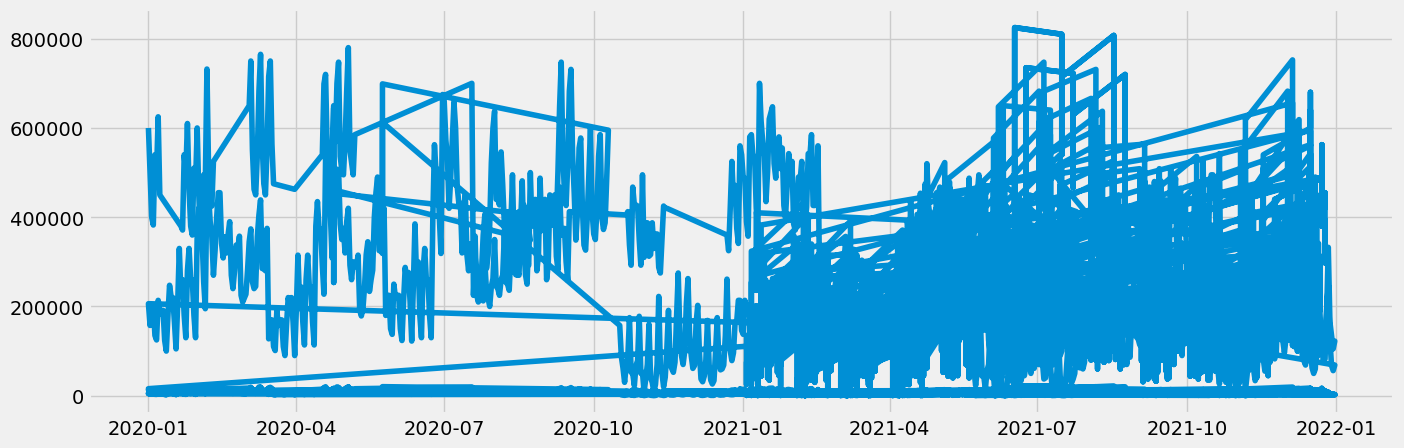

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_date)